## Лабораторная работа 2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [7]:
import pandas as pd

data = pd.read_csv('athlete_events.csv')

print(data.head())

# Проверка на пропуски
print(data.isnull().sum())

print(data.shape)

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

#### Обработка пропусков
Age: заполним средним значением или медианой, так как это числовой признак.
Height: Аналогично.
Weight: Аналогично.

In [8]:
from sklearn.impute import SimpleImputer

total_count = data.shape[0]
num_cols = []

# Цикл по колонкам датасета
for col in data.columns:
    temp_null_count = data[col].isnull().sum()
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

# Удаление записей с пропущенными значениями в столбце Medal
data.dropna(subset=['Medal'], inplace=True)

# Используем медиану для заполнения числовых пропусков
imputer = SimpleImputer(strategy='median')

# Применяем imputer к числовым колонкам
data[num_cols] = imputer.fit_transform(data[num_cols])

print(data.isnull().sum())
print(data.shape)

Колонка Age. Тип данных float64. Количество пустых значений 9474, 3.49%.
Колонка Height. Тип данных float64. Количество пустых значений 60171, 22.19%.
Колонка Weight. Тип данных float64. Количество пустых значений 62875, 23.19%.
Колонка Medal. Тип данных object. Количество пустых значений 231333, 85.33%.
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64
(39783, 15)


#### Визуализация данных

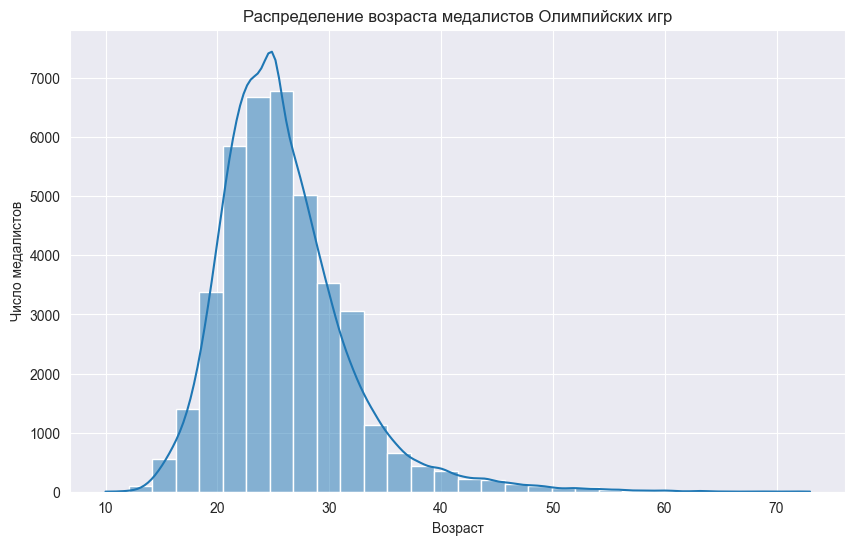

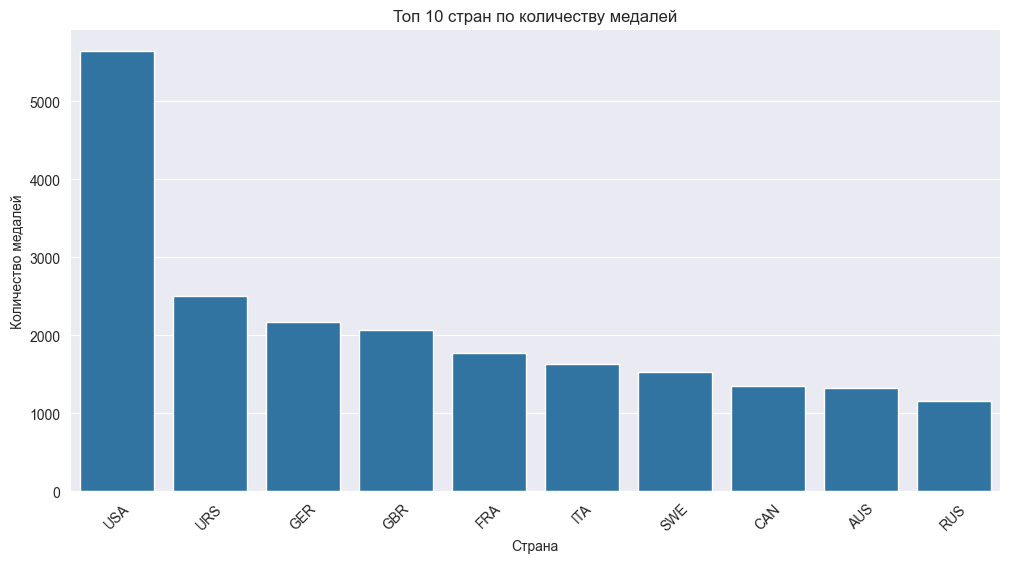

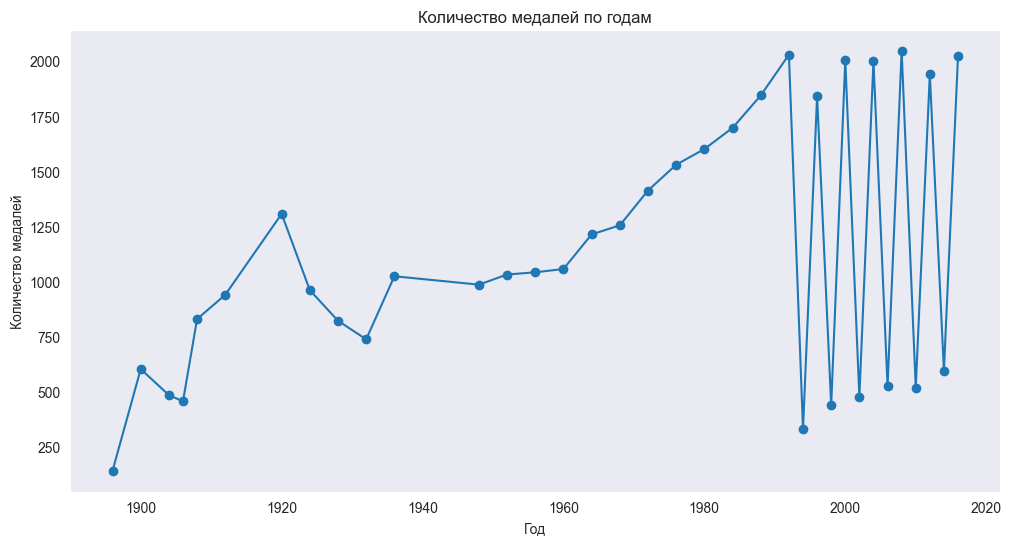

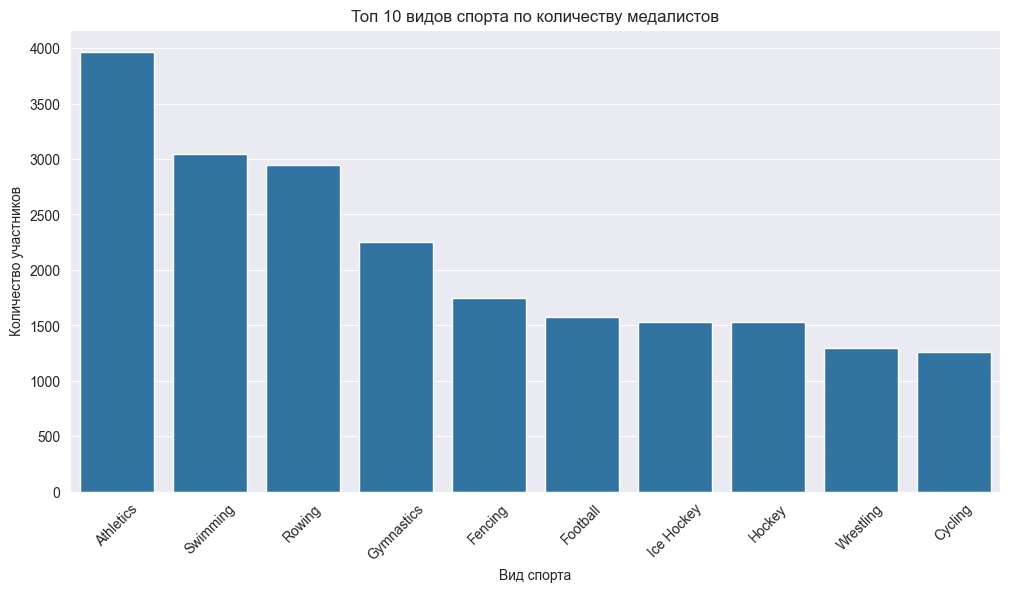

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма возраста участников
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Распределение возраста медалистов Олимпийских игр')
plt.xlabel('Возраст')
plt.ylabel('Число медалистов')
plt.show()

# Сравнение медалей по странам
medals_by_country = data[data['Medal'].notnull()]['NOC'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values)
plt.title('Топ 10 стран по количеству медалей')
plt.xlabel('Страна')
plt.ylabel('Количество медалей')
plt.xticks(rotation=45)
plt.show()

# Временные ряды медалей по годам
medals_over_years = data[data['Medal'].notnull()].groupby('Year')['Medal'].count()

plt.figure(figsize=(12, 6))
medals_over_years.plot(kind='line', marker='o')
plt.title('Количество медалей по годам')
plt.xlabel('Год')
plt.ylabel('Количество медалей')
plt.grid()
plt.show()

# Распределение видов спорта
sports_count = data['Sport'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sports_count.index, y=sports_count.values)
plt.title('Топ 10 видов спорта по количеству медалистов')
plt.xlabel('Вид спорта')
plt.ylabel('Количество участников')
plt.xticks(rotation=45)
plt.show()

#### Кодирование категориальных признаков
В датасете есть несколько категориальных признаков, таких как Sex, Team, NOC, Games, Season, City, Sport, Event, и Medal. Для кодирования категориальных признаков можно использовать метод pd.get_dummies() из библиотеки sklearn.

In [10]:
# Кодирование бинарного признака 'Sex'
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})

# Кодирование остальных категориальных признаков
categorical_cols = ['Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']
data = pd.get_dummies(data, columns=categorical_cols)

print(data.head())

    ID                      Name  Sex   Age  Height  Weight  Year  \
3    4      Edgar Lindenau Aabye    1  34.0   178.0    73.0  1900   
37  15      Arvo Ossian Aaltonen    1  30.0   178.0    73.0  1920   
38  15      Arvo Ossian Aaltonen    1  30.0   178.0    73.0  1920   
40  16  Juhamatti Tapio Aaltonen    1  28.0   184.0    85.0  2014   
41  17   Paavo Johannes Aaltonen    1  28.0   175.0    64.0  1948   

    Team_A North American Team  Team_Afghanistan  Team_Algeria  ...  \
3                        False             False         False  ...   
37                       False             False         False  ...   
38                       False             False         False  ...   
40                       False             False         False  ...   
41                       False             False         False  ...   

    Event_Wrestling Men's Welterweight, Greco-Roman  \
3                                             False   
37                                            Fa

#### Масштабирование данных
Для масштабирования числовых признаков, таких как Age, Height, и Weight, можно использовать StandardScaler или MinMaxScaler из библиотеки sklearn. Используем StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

# Масштабирование числовых признаков
scaler = StandardScaler()
data[['Age', 'Height', 'Weight']] = scaler.fit_transform(data[['Age', 'Height', 'Weight']])

# Проверка итогового датасета
print(data.head())

    ID                      Name  Sex       Age    Height    Weight  Year  \
3    4      Edgar Lindenau Aabye    1  1.380718  0.036160 -0.044893  1900   
37  15      Arvo Ossian Aaltonen    1  0.698195  0.036160 -0.044893  1920   
38  15      Arvo Ossian Aaltonen    1  0.698195  0.036160 -0.044893  1920   
40  16  Juhamatti Tapio Aaltonen    1  0.356934  0.659273  0.868193  2014   
41  17   Paavo Johannes Aaltonen    1  0.356934 -0.275396 -0.729708  1948   

    Team_A North American Team  Team_Afghanistan  Team_Algeria  ...  \
3                        False             False         False  ...   
37                       False             False         False  ...   
38                       False             False         False  ...   
40                       False             False         False  ...   
41                       False             False         False  ...   

    Event_Wrestling Men's Welterweight, Greco-Roman  \
3                                             False   


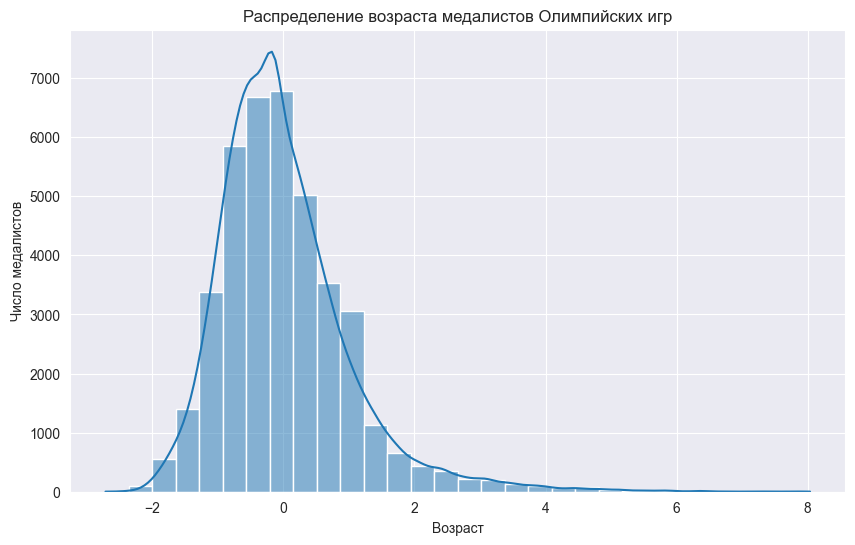

In [12]:
# Гистограмма возраста участников
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Распределение возраста медалистов Олимпийских игр')
plt.xlabel('Возраст')
plt.ylabel('Число медалистов')
plt.show()